### Exp-14: Fake News Detection

In [1]:
# Importing Libraries: data loading and EDA
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries for text preprocessing
import re,spacy,nltk,string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("D:\SEM 3\PDS Journal\\FA-KES-Dataset.csv", encoding='iso-8859-1')

#### Preprocessing

In [3]:
df.head()

,unit_id,article_title,article_content,source,date,location,labels,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,04-05-2017,idlib,0,NaN,NaN,NaN,NaN
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,04-07-2017,homs,0,NaN,NaN,NaN,NaN
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0,NaN,NaN,NaN,NaN
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0,NaN,NaN,NaN,NaN
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,07-10-2016,aleppo,0,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['unit_id', 'article_title', 'article_content', 'source', 'date',
       'location', 'labels', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],axis=1,inplace=True)

In [6]:
df

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,04-05-2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,04-07-2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,07-10-2016,aleppo,0
...,...,...,...,...,...,...,...
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,08-01-2016,aleppo,1
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,08-03-2016,aleppo,0
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,08-01-2016,idlib,1


In [7]:
df['labels'].value_counts()

1    426
0    378
Name: labels, dtype: int64

In [8]:
df['article_title']

0      Syria attack symptoms consistent with nerve ag...
1      Homs governor says U.S. attack caused deaths b...
2        Death toll from Aleppo bomb attack at least 112
3            Aleppo bomb blast kills six Syrian state TV
4      29 Syria Rebels Dead in Fighting for Key Alepp...
                             ...                        
799      Turkish Bombardment Kills 20 Civilians in Syria
800      Martyrs as Terrorists Shell Aleppos Salah Eddin
801    Chemical Attack Kills Five Syrians in Aleppo SANA
802    5 Killed as Russian Military Chopper Shot down...
803    Syrian Army Kills 48 ISIL Terrorists in Deir E...
Name: article_title, Length: 804, dtype: object

In [9]:
df.shape

(804, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   date             804 non-null    object
 5   location         804 non-null    object
 6   labels           804 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 44.1+ KB


In [11]:
df.isna().sum()

unit_id            0
article_title      0
article_content    0
source             0
date               0
location           0
labels             0
dtype: int64

In [12]:
dict={
    "unit_id":"id",
    "articl_title":"title",
    "article_content":"content"
}

In [13]:
df.rename(columns=dict)

,id,article_title,content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,04-05-2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,04-07-2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,07-10-2016,aleppo,0
...,...,...,...,...,...,...,...
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,08-01-2016,aleppo,1
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,08-03-2016,aleppo,0
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,08-01-2016,idlib,1


In [14]:
# Dropping missing values
df.dropna(inplace=True)

In [15]:
# Converting to lower case
df['article_content'] = df['article_content'].str.lower()

In [16]:
# Removing punctuation and special characters
df['article_content'] = df['article_content'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [17]:
# Tokenizing
nlp = spacy.load('en_core_web_sm')
df['article_content'] = df['article_content'].apply(lambda x: [token.text for token in nlp(x)])

In [18]:
sample_text = "Syria attack symptoms consistent with nerve agent"
tokens = [token.text for token in nlp(sample_text)]
print(tokens)

['Syria', 'attack', 'symptoms', 'consistent', 'with', 'nerve', 'agent']


In [19]:
# Removing stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['article_content'] = df['article_content'].apply(lambda x: [word for word in x if word not in stop_words])

In [20]:
# Lemmitization
nlp = spacy.load('en_core_web_sm')
df['article_content'] = df['article_content'].apply(
    lambda x: [token.lemma_ for token in nlp(' '.join(x))])


In [21]:
sample_text = "Syria attack symptoms consistent with nerve agent"
lemmatized_text = [token.lemma_ for token in nlp(sample_text)]
print(lemmatized_text)

['Syria', 'attack', 'symptom', 'consistent', 'with', 'nerve', 'agent']


#### Feature Selection

In [22]:
# Feature selection
X=df['article_content']
y=df['labels']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train_processed = [' '.join(tokens) for tokens in X_train]
X_test_processed = [' '.join(tokens) for tokens in X_test]

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_processed)
X_test_tfidf = tfidf_vectorizer.transform(X_test_processed)

#### Models

In [25]:
def model_evaluation(y_test, y_pred, model_name, y_scores=None):
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, jaccard_score, precision_score, recall_score, roc_curve, auc
    import matplotlib.pyplot as plt
    
    # Classification Report
    print("Classification report for", model_name, "\n")
    print(classification_report(y_test, y_pred))

    # Accuracy
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    print("Accuracy:", accuracy)
    
    # F1-score
    f1 = round(f1_score(y_test, y_pred), 2)
    print("F1-score:", f1)

    # Jaccard's Index
    jaccard = round(jaccard_score(y_test, y_pred), 2)
    print("Jaccard's Index:", jaccard)

    # Precision & Recall
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    print("Precision:", precision)
    print("Recall:", recall)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.title("Confusion Matrix")
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # AUC-ROC Curve
    if y_scores is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        roc_auc = round(auc(fpr, tpr), 2)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc}')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'AOC-ROC Curve for {model_name}')
        plt.legend(loc="lower right")
        plt.show()

    return


Classification report for KNN CLASSIFIER 

              precision    recall  f1-score   support

           0       0.52      0.49      0.50        72
           1       0.61      0.64      0.62        89

    accuracy                           0.57       161
   macro avg       0.56      0.56      0.56       161
weighted avg       0.57      0.57      0.57       161

Accuracy: 0.57
F1-score: 0.62
Jaccard's Index: 0.45
Precision: 0.61
Recall: 0.64


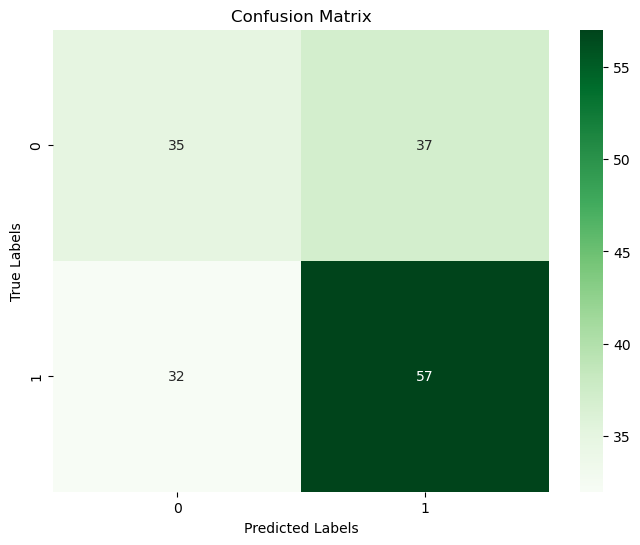

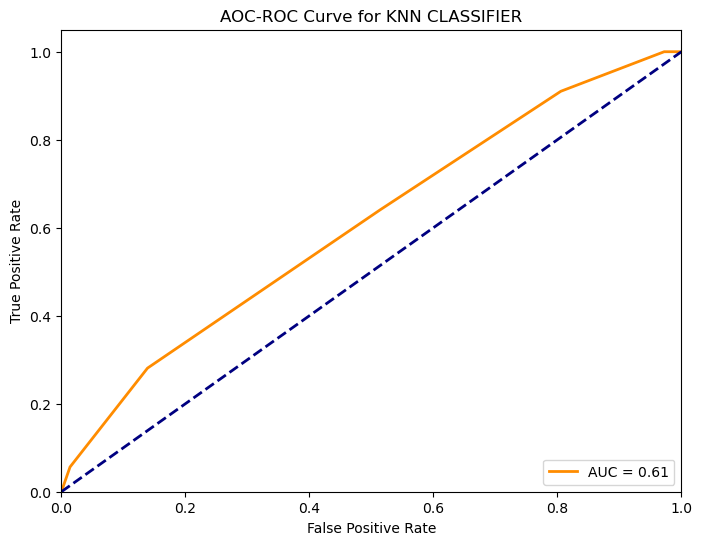

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model_name = "KNN CLASSIFIER"
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)
y_pred_knn = knn.predict(X_test_tfidf)
y_scores_knn = knn.predict_proba(X_test_tfidf)[:, 1]

model_evaluation(y_test, y_pred_knn, model_name, y_scores_knn)

Classification report for NAIVE BAYES 

              precision    recall  f1-score   support

           0       0.54      0.19      0.29        72
           1       0.57      0.87      0.69        89

    accuracy                           0.57       161
   macro avg       0.55      0.53      0.49       161
weighted avg       0.56      0.57      0.51       161

Accuracy: 0.57
F1-score: 0.69
Jaccard's Index: 0.52
Precision: 0.57
Recall: 0.87


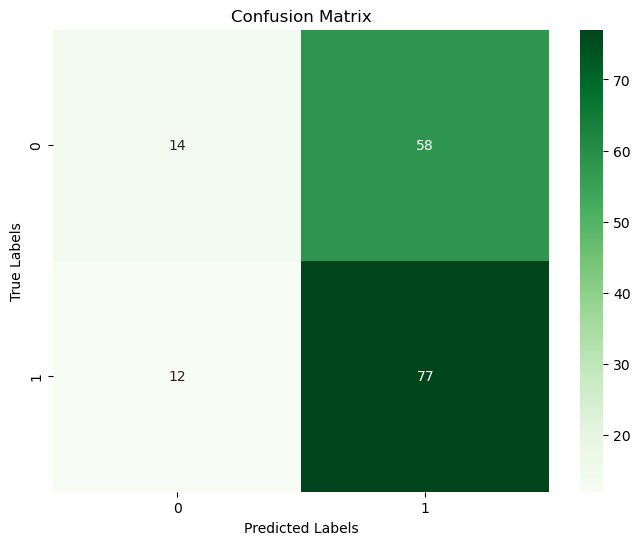

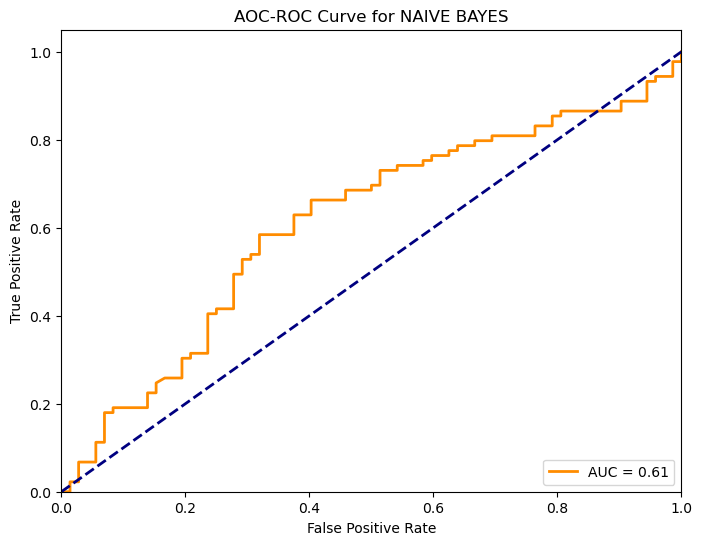

In [27]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model_name="NAIVE BAYES"
nb=MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb=nb.predict(X_test_tfidf)
y_scores_nb = nb.predict_proba(X_test_tfidf)[:, 1]

model_evaluation(y_test, y_pred_nb, model_name, y_scores_nb)

Classification report for LOGISTIC REGRESSION 

              precision    recall  f1-score   support

           0       0.51      0.43      0.47        72
           1       0.59      0.66      0.62        89

    accuracy                           0.56       161
   macro avg       0.55      0.55      0.55       161
weighted avg       0.55      0.56      0.55       161

Accuracy: 0.56
F1-score: 0.62
Jaccard's Index: 0.45
Precision: 0.59
Recall: 0.66


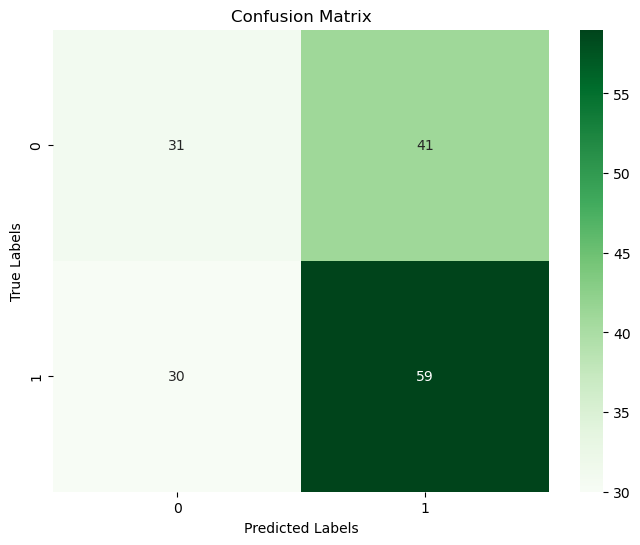

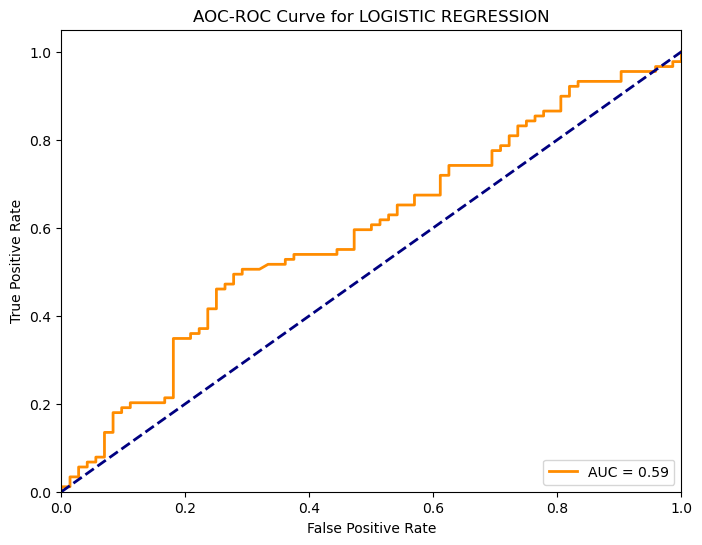

In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_name="LOGISTIC REGRESSION"
lr=LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred_lr=lr.predict(X_test_tfidf)
y_scores_lr = lr.predict_proba(X_test_tfidf)[:, 1]

model_evaluation(y_test, y_pred_lr, model_name, y_scores_lr)

In [30]:
import joblib
model = nb
model_path = 'D:\\SEM 3\\PDS Journal\\fake_news_model.pkl'
joblib.dump(model, model_path)

['D:\\SEM 3\\PDS Journal\\fake_news_model.pkl']

In [31]:
model=nb
vectorizer = TfidfVectorizer() 
X_train_tfidf = vectorizer.fit_transform(X_train_processed)

model_path="D:\\SEM 3\\PDS Journal\\tfidf_vectorizer.pkl"
joblib.dump(vectorizer, model_path)

['D:\\SEM 3\\PDS Journal\\tfidf_vectorizer.pkl']